In [2]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt

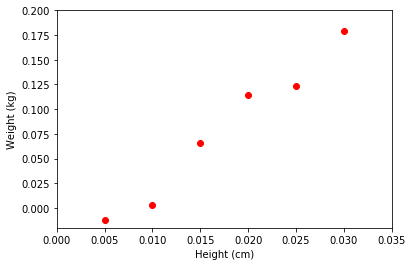

In [31]:
# height (cm)
X = np.array([[0.030, 0.025, 0.020, 0.015, 0.010, 0.005]]).T
# weight (kg)
y = np.array([[0.1796, 0.12361, 0.11483, 0.06585, 0.00295, -0.01169]]).T
# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([0, 0.035, -0.02, 0.2])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

w =  [[-0.05754933]
 [ 7.81377143]]
[0.005      0.00777778 0.01055556 0.01333333 0.01611111 0.01888889
 0.02166667 0.02444444 0.02722222 0.03      ]
[-0.01848048  0.00322444  0.02492937  0.04663429  0.06833921  0.09004413
  0.11174905  0.13345397  0.15515889  0.17686381]


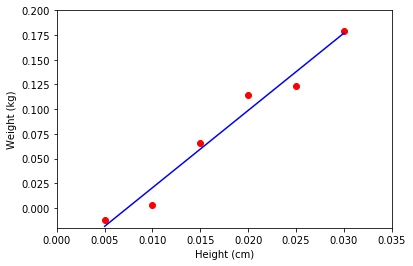

In [32]:
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(5, 30, 10)/1000
print(x0)
y0 = w_0 + w_1*x0
print(y0)
# Drawing the fitting line 
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0, 'b')               # the fitting line
plt.axis([0, 0.035, -0.02, 0.2])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [22]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y2) )

Predict weight of person with height 155 cm: 5056.67 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 5219.78 (kg), real number: 56 (kg)


In [35]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)

Solution found by scikit-learn  :  [[-0.05754933  7.81377143]]
Solution found by (5):  [[-0.05754933  7.81377143]]


In [36]:
print(regr.coef_[0][1])

7.813771428571431


In [37]:
from sklearn.metrics import r2_score
y_pred = w_0 + w_1*X
print(y_pred)
print(y)
r2_score(y, y_pred)

[[ 0.17686381]
 [ 0.13779495]
 [ 0.0987261 ]
 [ 0.05965724]
 [ 0.02058838]
 [-0.01848048]]
[[ 0.1796 ]
 [ 0.12361]
 [ 0.11483]
 [ 0.06585]
 [ 0.00295]
 [-0.01169]]


0.9686816674358246

Solution found by scikit-learn  :  [[6.86666667e-03 2.53885714e+01]]


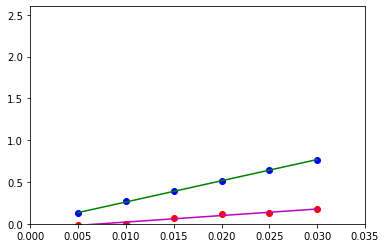

R2:  0.9989752620105145
Solution found by UV-VIS:  25.388571428571428
R2:  0.9686816674358246
Solution found by Smartphone:  [7.81377143]


In [38]:
ynew = np.array([[0.764, 0.644, 0.51, 0.398, 0.267, 0.124]]).T
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, ynew)
print( 'Solution found by scikit-learn  : ', regr.coef_ )
ynew_pred = regr.coef_[0][0] + regr.coef_[0][1]*X
yn = regr.coef_[0][0] + regr.coef_[0][1]*x0

plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0, 'm')               # the fitting line
plt.plot(X.T, ynew.T, 'bo')
plt.plot(x0, yn, 'g')   
plt.axis([0, 0.035, 0, 2.6])
plt.show()
print('R2: ',r2_score(ynew, ynew_pred))
print( 'Solution found by UV-VIS: ', regr.coef_[0][1])
print('R2: ',r2_score(y, y_pred))
print( 'Solution found by Smartphone: ', w[1].T)